<h1 align="center">Internshala's Data Science Specialization </h1><br>

## Course Project Report - Rainfall Prediction (Classification Problem)

<div  style="font-size: 16px">
Organization: <b>Internshala</b><br>
Course: <b>Interview Preparation</b><br>
Project: <b>Rainfall Prediction - Classification Problem</b><br>
Programming Language: <b>Python</b><br>
Submitted by: <b>Lavkush Singh</b>
</div>

### Problem Statement

**The project aims at building a model to accurately predict tommorow's rainfall based on the historical data**

### Task: Reading and Understanding the data

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import dabl
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
# settings to display all columns

pd.set_option("display.max_columns", None)
pd.options.display.max_rows = None

In [3]:
# reading the data

rainfall_data = pd.read_excel("Datasets/sydney_rain prediction.xlsx")

In [4]:
rainfall_data.head()   # viewing first few observations of the dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [5]:
rainfall_data.describe(exclude='object', datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Date,3337,2012-10-16 01:24:34.737788672,2008-02-01 00:00:00,2010-05-15 00:00:00,2012-09-28 00:00:00,2015-03-14 00:00:00,2017-06-25 00:00:00,NaN
MinTemp,3334.0,14.865057,4.3,11.0,14.9,18.7,27.6,4.553641
MaxTemp,3335.0,23.002339,11.7,19.6,22.8,26.0,45.8,4.494638
Rainfall,3331.0,3.330231,0.0,0.0,0.0,1.4,119.4,9.895172
Evaporation,3286.0,5.187432,0.0,3.2,4.8,7.0,18.4,2.777407
Sunshine,3321.0,7.179374,0.0,4.3,8.3,10.2,13.6,3.810886
Humidity9am,3323.0,68.22901,19.0,58.0,69.0,80.0,100.0,15.085355
Humidity3pm,3324.0,54.699158,10.0,44.0,56.0,65.0,99.0,16.29353
Pressure9am,3317.0,1018.346156,986.7,1013.7,1018.6,1023.1,1039.0,7.021571
Pressure3pm,3318.0,1016.018774,989.8,1011.3,1016.3,1020.8,1036.7,7.032211


In [6]:
rainfall_data.describe(include='object', datetime_is_numeric=True).T

,count,unique,top,freq
Location,3337,1,Sydney,3337
RainToday,3331,2,No,2465
RainTomorrow,3337,2,No,2472


In [7]:
rainfall_data.info()   # getting information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

### Task: Data Exploration and Pre-Processing

In [8]:
rainfall_data['Location'].value_counts()

Sydney    3337
Name: Location, dtype: int64

##### since 'Location' column only consists of 'Sydney', we are dropping this column 

In [9]:
rainfall_data.drop('Location', axis = 1, inplace=True)

In [10]:
rainfall_data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


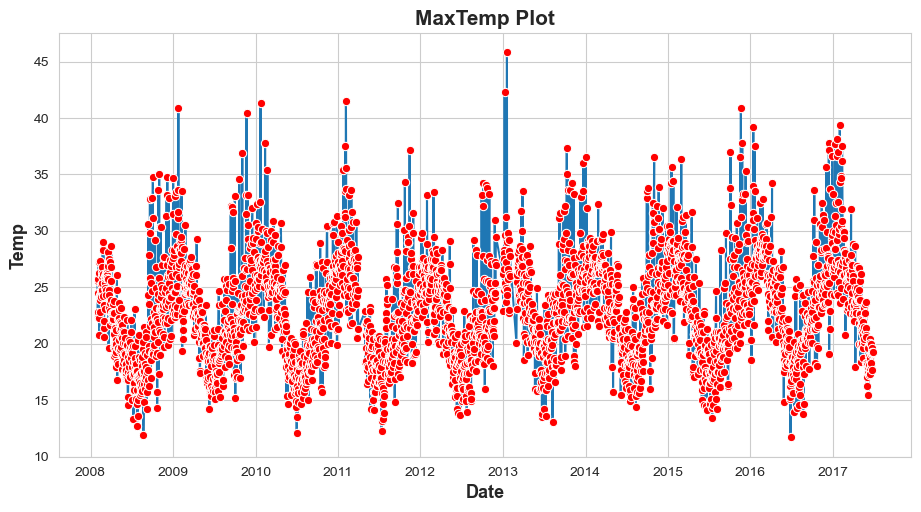

In [11]:
plt.figure(figsize=(11,5.5))
sns.set_style("whitegrid")
sns.lineplot(x = 'Date', y = 'MaxTemp', data = rainfall_data, marker='o', mfc = 'red')  
plt.title('MaxTemp Plot', fontsize=15, fontweight="bold")
plt.ylabel('Temp', fontsize=13, fontweight="bold")
plt.xlabel('Date', fontsize=13, fontweight="bold");

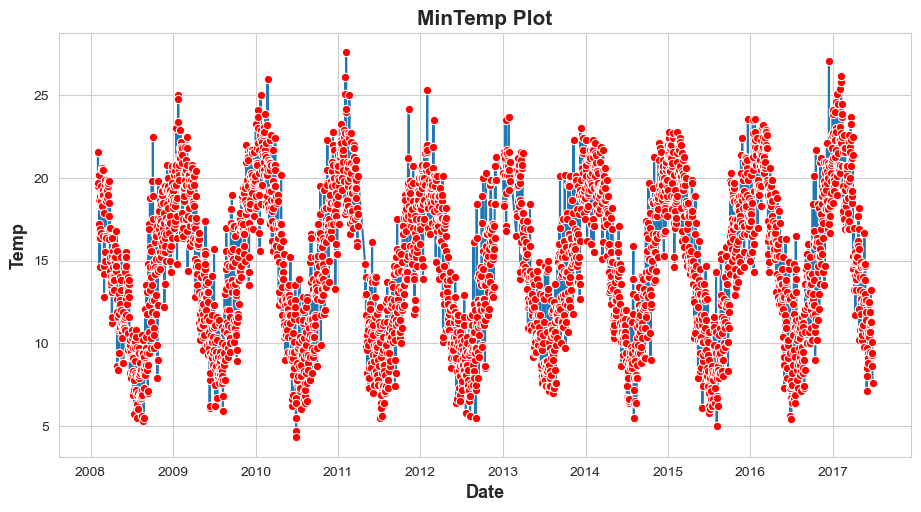

In [12]:
plt.figure(figsize=(11,5.5))
sns.set_style("whitegrid")
sns.lineplot(x = 'Date', y = 'MinTemp', data = rainfall_data, marker='o', mfc = 'red')  
plt.title('MinTemp Plot', fontsize=15, fontweight="bold")
plt.ylabel('Temp', fontsize=13, fontweight="bold")
plt.xlabel('Date', fontsize=13, fontweight="bold");

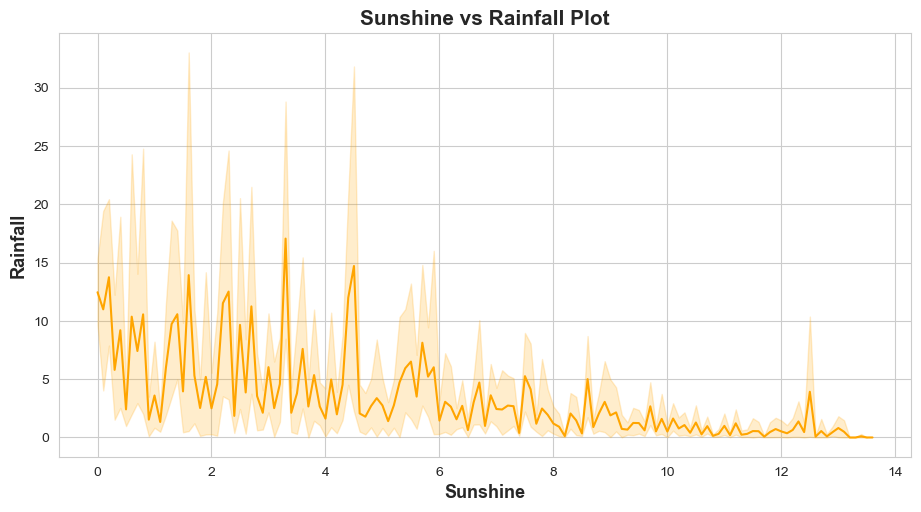

In [13]:
plt.figure(figsize=(11,5.5))
sns.set_style("whitegrid")
sns.lineplot(x='Sunshine',y='Rainfall',data=rainfall_data,color='orange') 
plt.title('Sunshine vs Rainfall Plot', fontsize=15, fontweight="bold")
plt.ylabel('Rainfall', fontsize=13, fontweight="bold")
plt.xlabel('Sunshine', fontsize=13, fontweight="bold");

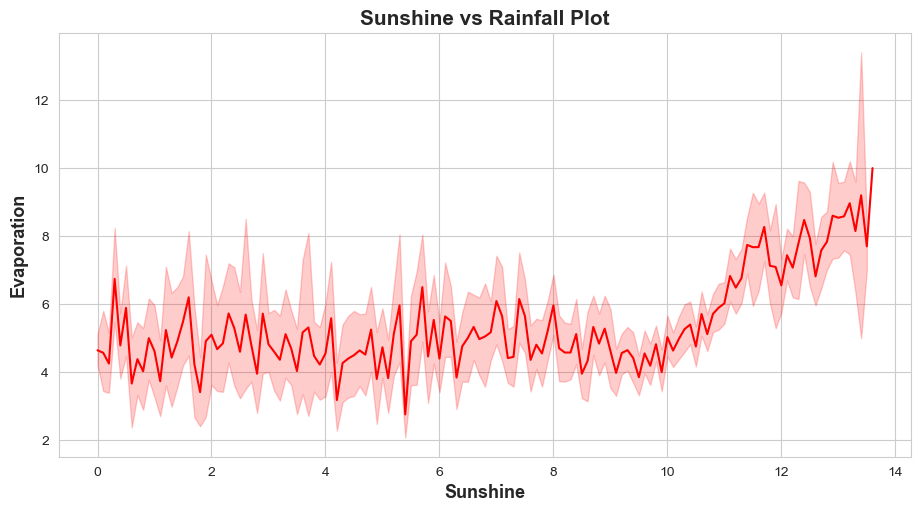

In [14]:
plt.figure(figsize=(11,5.5))
sns.set_style("whitegrid")
sns.lineplot(x='Sunshine',y='Evaporation',data=rainfall_data,color='red') 
plt.title('Sunshine vs Rainfall Plot', fontsize=15, fontweight="bold")
plt.ylabel('Evaporation', fontsize=13, fontweight="bold")
plt.xlabel('Sunshine', fontsize=13, fontweight="bold");

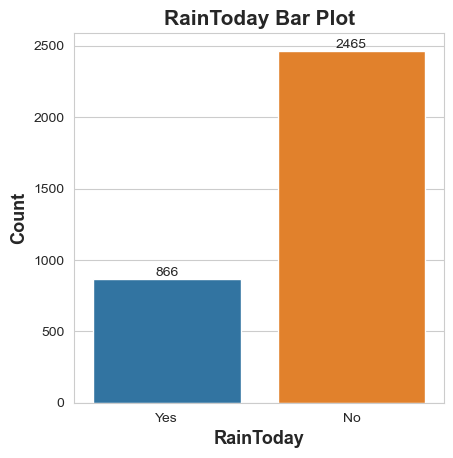

In [15]:
sns.set_style("whitegrid")
ax = sns.countplot(x='RainToday',data=rainfall_data)
ax.set_box_aspect(2/len(ax.patches)) #change 10 to modify the y/x axis ratio
ax.bar_label(ax.containers[0])
plt.title('RainToday Bar Plot', fontsize=15, fontweight="bold")
plt.ylabel('Count', fontsize=13, fontweight="bold")
plt.xlabel('RainToday', fontsize=13, fontweight="bold");

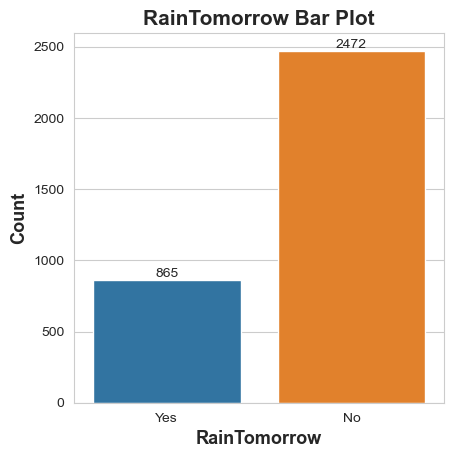

In [16]:
sns.set_style("whitegrid")
ax = sns.countplot(x='RainTomorrow',data=rainfall_data)
ax.set_box_aspect(2/len(ax.patches)) #change 10 to modify the y/x axis ratio
ax.bar_label(ax.containers[0])
plt.title('RainTomorrow Bar Plot', fontsize=15, fontweight="bold")
plt.ylabel('Count', fontsize=13, fontweight="bold")
plt.xlabel('RainTomorrow', fontsize=13, fontweight="bold");

#### Encoding the object type data to numbers

In [17]:
rainfall_data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [18]:
rainfall_data['RainToday'] = rainfall_data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
rainfall_data['RainTomorrow'] = rainfall_data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [19]:
rainfall_data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


#### Outlier Identification and Treatment

In [20]:
# this function takes the column and the dataframe and returns the total number of outliers and the percent of outliers 
# based on IQR (i.e. based on 25th and 75th percentile values)

def find_outliers_stats(df):
    out_stats = dict()
    for col in df.columns[:-1]:
        
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)
    
        iqr = percentile75 - percentile25
    
        upper_limit = percentile75 + (1.5 * iqr)
        lower_limit = percentile25 - (1.5 * iqr)
    
        outliers_count = len(df[df[col] > upper_limit]) + len(df[df[col] < lower_limit])
        outliers_percent = round((outliers_count/df.shape[0])*100,2)
        
        out_stats[col] = (outliers_count, outliers_percent)
    
    df_outlier_stats = pd.DataFrame(out_stats, index=['no_of_outliers', 'no_of_outliers_percent']).T
    return df_outlier_stats

In [21]:
out_stats = find_outliers_stats(rainfall_data)
out_stats

,no_of_outliers,no_of_outliers_percent
Date,0.0,0.00
MinTemp,0.0,0.00
MaxTemp,34.0,1.02
Rainfall,612.0,18.34
Evaporation,35.0,1.05
Sunshine,0.0,0.00
Humidity9am,12.0,0.36
Humidity3pm,7.0,0.21
Pressure9am,24.0,0.72
Pressure3pm,21.0,0.63


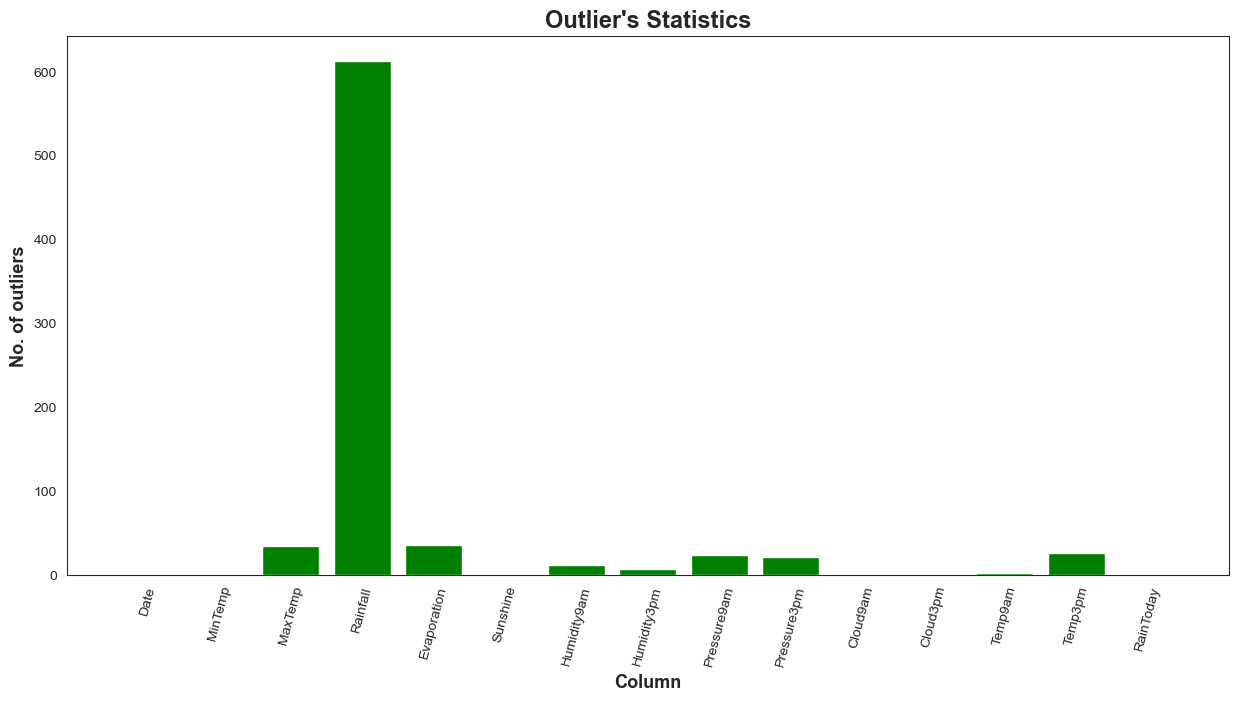

In [22]:
sns.set_style('white')
plt.figure(figsize=(15,7))

plt.bar(out_stats.index, 
        out_stats['no_of_outliers'].values, 
        color='g')

plt.xticks(rotation = 75)
plt.title("Outlier's Statistics", fontsize=17, fontweight="bold")
plt.ylabel('No. of outliers', fontsize=13, fontweight="bold")
plt.xlabel('Column', fontsize=13, fontweight="bold");

In [23]:
def outlier_capping(df):
    
    """
    This function takes a dataframe, and capps all the columns with IQR's upper and lower limit, resulting in outlier removal
    """
    
    for col in df.columns:
    
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)

        iqr = percentile75 - percentile25
    
        upper_limit = percentile75 + (1.5 * iqr)
        lower_limit = percentile25 - (1.5 * iqr)
        
        df.loc[df[col]<lower_limit,col] = lower_limit
        df.loc[df[col]>upper_limit,col] = upper_limit
    
    return df

In [24]:
rainfall_data_preprocessed = outlier_capping(rainfall_data)
rainfall_data_preprocessed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,3.5,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
1,2008-02-02,19.5,25.6,3.5,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
2,2008-02-03,21.6,24.5,3.5,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
3,2008-02-04,20.2,22.8,3.5,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
4,2008-02-05,19.7,25.7,3.5,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0


#### Missing value analysis

In [25]:
rainfall_data_preprocessed.isnull().sum()  # getting the sum of missing values per column

Date              0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         0
RainTomorrow      0
dtype: int64

In [26]:
# getting the sum of missing values per column in %
missing_vals_percent = round((rainfall_data_preprocessed.isnull().sum() / rainfall_data_preprocessed.shape[0])*100,2) 
missing_vals_percent = missing_vals_percent[missing_vals_percent>0]
missing_vals_percent

MinTemp         0.09
MaxTemp         0.06
Rainfall        0.18
Evaporation     1.53
Sunshine        0.48
Humidity9am     0.42
Humidity3pm     0.39
Pressure9am     0.60
Pressure3pm     0.57
Cloud9am       16.96
Cloud3pm       16.81
Temp9am         0.12
Temp3pm         0.12
dtype: float64

##### the columns Cloud9am & Cloud3pm have maximum, of about 17% missing values. 

In [27]:
for col in missing_vals_percent.index:
    print(f"Imputing the missing values in column: {col}", end="...")
    mean_value = rainfall_data_preprocessed[col].mean()
    rainfall_data_preprocessed[col].fillna(mean_value,inplace=True)
    print("done!")

Imputing the missing values in column: MinTemp...done!
Imputing the missing values in column: MaxTemp...done!
Imputing the missing values in column: Rainfall...done!
Imputing the missing values in column: Evaporation...done!
Imputing the missing values in column: Sunshine...done!
Imputing the missing values in column: Humidity9am...done!
Imputing the missing values in column: Humidity3pm...done!
Imputing the missing values in column: Pressure9am...done!
Imputing the missing values in column: Pressure3pm...done!
Imputing the missing values in column: Cloud9am...done!
Imputing the missing values in column: Cloud3pm...done!
Imputing the missing values in column: Temp9am...done!
Imputing the missing values in column: Temp3pm...done!


In [28]:
rainfall_data_preprocessed.isnull().sum()

Date            0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

### Feature Engineering the "Date" column

In [29]:
rainfall_data_preprocessed['Date'].head()

0   2008-02-01
1   2008-02-02
2   2008-02-03
3   2008-02-04
4   2008-02-05
Name: Date, dtype: datetime64[ns]

In [30]:
rainfall_data_preprocessed['year'] = rainfall_data_preprocessed['Date'].dt.year
rainfall_data_preprocessed['month'] = rainfall_data_preprocessed['Date'].dt.month
rainfall_data_preprocessed['day'] = rainfall_data_preprocessed['Date'].dt.day

In [31]:
rainfall_data_preprocessed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-02-01,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0,2008,2,1
1,2008-02-02,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0,2008,2,2
2,2008-02-03,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0,2008,2,3
3,2008-02-04,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0,2008,2,4
4,2008-02-05,19.7,25.7,3.5,5.174194,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0,2008,2,5


In [32]:
rainfall_data_preprocessed.drop('Date', axis = 1, inplace=True)

In [33]:
rainfall_data_preprocessed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0,2008,2,1
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0,2008,2,2
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0,2008,2,3
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0,2008,2,4
4,19.7,25.7,3.5,5.174194,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0,2008,2,5


### Correlation analysis using Heatmap

In [34]:
rainfall_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3337 non-null   float64
 14  RainTomorrow  3337 non-null   float64
 15  year          3337 non-null   int64  
 16  month         3337 non-null   int64  
 17  day           3337 non-null   int64  
dtypes: float64(15), int64(3)
mem

In [35]:
# getting correlation of the data columns with each other

corr_data = rainfall_data_preprocessed.corr().round(1)
corr_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
MinTemp,1.0,0.8,0.0,0.6,-0.1,0.1,0.3,-0.4,-0.4,0.2,0.2,0.9,0.8,0.0,0.1,0.1,-0.3,0.0
MaxTemp,0.8,1.0,-0.2,0.5,0.3,-0.2,-0.1,-0.4,-0.4,-0.1,-0.1,0.9,1.0,-0.2,-0.2,0.1,-0.2,0.0
Rainfall,0.0,-0.2,1.0,-0.2,-0.4,0.4,0.4,-0.0,0.1,0.3,0.3,-0.1,-0.2,1.0,0.4,0.0,-0.0,-0.0
Evaporation,0.6,0.5,-0.2,1.0,0.2,-0.4,-0.1,-0.3,-0.3,-0.0,-0.0,0.6,0.5,-0.2,-0.1,0.1,0.0,-0.0
Sunshine,-0.1,0.3,-0.4,0.2,1.0,-0.5,-0.6,-0.0,-0.1,-0.7,-0.7,0.1,0.3,-0.4,-0.5,0.0,0.1,0.0
Humidity9am,0.1,-0.2,0.4,-0.4,-0.5,1.0,0.7,0.3,0.3,0.4,0.3,-0.1,-0.2,0.4,0.3,-0.1,-0.2,0.0
Humidity3pm,0.3,-0.1,0.4,-0.1,-0.6,0.7,1.0,0.2,0.2,0.5,0.5,0.1,-0.2,0.3,0.5,-0.1,-0.1,0.0
Pressure9am,-0.4,-0.4,-0.0,-0.3,-0.0,0.3,0.2,1.0,1.0,-0.0,-0.0,-0.4,-0.3,0.0,-0.0,0.0,-0.0,-0.0
Pressure3pm,-0.4,-0.4,0.1,-0.3,-0.1,0.3,0.2,1.0,1.0,0.0,-0.0,-0.4,-0.4,0.1,0.0,0.0,-0.0,-0.0
Cloud9am,0.2,-0.1,0.3,-0.0,-0.7,0.4,0.5,-0.0,0.0,1.0,0.6,0.1,-0.1,0.3,0.3,0.0,-0.0,-0.0


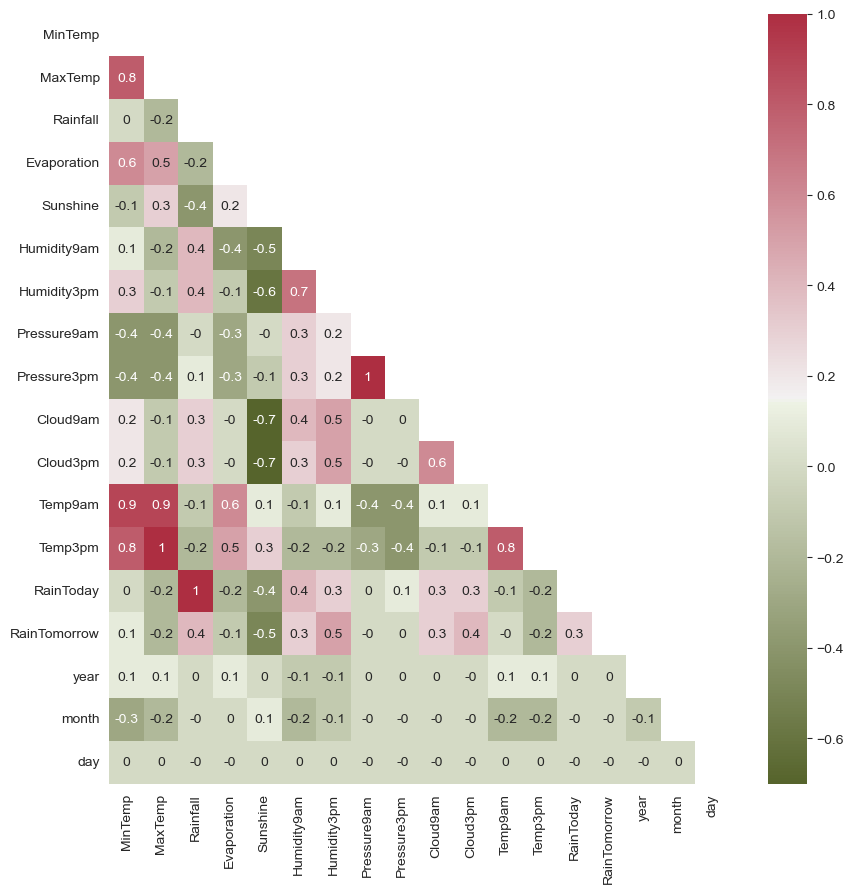

In [36]:
plt.figure(figsize=(10,10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr_data))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# using the upper triangle matrix as mask 
dataplot = sns.heatmap(corr_data, annot=True, mask=matrix, cmap=cmap);
  
# displaying heatmap 
plt.show() 

In [37]:
fig = plt.figure(figsize=(7,5))

corr = rainfall_data_preprocessed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Luvkush\AppData\Local\Temp\ipykernel_12152\401722531.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
MinTemp,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MaxTemp,0.78,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Rainfall,0.02,-0.19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Evaporation,0.57,0.51,-0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sunshine,-0.06,0.33,-0.38,0.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Humidity9am,0.05,-0.18,0.42,-0.39,-0.49,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Humidity3pm,0.27,-0.14,0.36,-0.10,-0.58,0.66,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pressure9am,-0.40,-0.39,-0.01,-0.35,-0.05,0.26,0.15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pressure3pm,-0.36,-0.43,0.05,-0.30,-0.10,0.25,0.18,0.96,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Cloud9am,0.24,-0.09,0.33,-0.04,-0.66,0.42,0.45,-0.01,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan


<Figure size 700x500 with 0 Axes>

In [38]:
# This code displays the columns which are highly correlated along with the magnitude and sign

for row in corr.columns:
    for col in corr.columns:
        if corr.loc[row, col] >= 0.6 or corr.loc[row, col] < -0.6:
            print(f"{row}    {col}: {corr.loc[row, col]}")

MaxTemp    MinTemp: 0.7756882527872216
Humidity3pm    Humidity9am: 0.6579686974414933
Pressure3pm    Pressure9am: 0.9607912317990496
Cloud9am    Sunshine: -0.660555236315765
Cloud3pm    Sunshine: -0.6763966300102237
Cloud3pm    Cloud9am: 0.6089954466393177
Temp9am    MinTemp: 0.939013149064429
Temp9am    MaxTemp: 0.8621919457422745
Temp9am    Evaporation: 0.609344022696271
Temp3pm    MinTemp: 0.7583662413592347
Temp3pm    MaxTemp: 0.9600126279449305
Temp3pm    Temp9am: 0.8331589359470795
RainToday    Rainfall: 0.958065524174355


In [39]:
rainfall_data_preprocessed.drop('MinTemp', axis = 1, inplace=True)

In [40]:
fig = plt.figure(figsize=(7,5))

corr = rainfall_data_preprocessed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
plt.show()

C:\Users\Luvkush\AppData\Local\Temp\ipykernel_12152\389632159.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


<Figure size 700x500 with 0 Axes>

In [41]:
# This code displays the columns which are highly correlated along with the magnitude and sign

for row in corr.columns:
    for col in corr.columns:
        if corr.loc[row, col] >= 0.6 or corr.loc[row, col] < -0.6:
            print(f"{row}    {col}: {corr.loc[row, col]}")

Humidity3pm    Humidity9am: 0.6579686974414933
Pressure3pm    Pressure9am: 0.9607912317990496
Cloud9am    Sunshine: -0.660555236315765
Cloud3pm    Sunshine: -0.6763966300102237
Cloud3pm    Cloud9am: 0.6089954466393177
Temp9am    MaxTemp: 0.8621919457422745
Temp9am    Evaporation: 0.609344022696271
Temp3pm    MaxTemp: 0.9600126279449305
Temp3pm    Temp9am: 0.8331589359470795
RainToday    Rainfall: 0.958065524174355


In [42]:
cols_to_drop = ['Humidity9am', 'Pressure3pm', 'Temp9am','Cloud9am']
rainfall_data_preprocessed.drop(cols_to_drop, axis = 1, inplace=True)

In [43]:
fig = plt.figure(figsize=(7,5))

corr = rainfall_data_preprocessed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
plt.show()

C:\Users\Luvkush\AppData\Local\Temp\ipykernel_12152\389632159.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


<Figure size 700x500 with 0 Axes>

In [44]:
# This code displays the columns which are highly correlated along with the magnitude and sign

for row in corr.columns:
    for col in corr.columns:
        if corr.loc[row, col] >= 0.6 or corr.loc[row, col] < -0.6:
            print(f"{row}    {col}: {corr.loc[row, col]}")

Cloud3pm    Sunshine: -0.6763966300102237
Temp3pm    MaxTemp: 0.9600126279449305
RainToday    Rainfall: 0.958065524174355


In [45]:
cols_to_drop = ['Cloud3pm', 'MaxTemp', 'RainToday']
rainfall_data_preprocessed.drop(cols_to_drop, axis = 1, inplace=True)

In [46]:
fig = plt.figure(figsize=(7,5))

corr = rainfall_data_preprocessed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Luvkush\AppData\Local\Temp\ipykernel_12152\401722531.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Rainfall,Evaporation,Sunshine,Humidity3pm,Pressure9am,Temp3pm,RainTomorrow,year,month,day
Rainfall,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Evaporation,-0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sunshine,-0.38,0.18,nan,nan,nan,nan,nan,nan,nan,nan
Humidity3pm,0.36,-0.10,-0.58,nan,nan,nan,nan,nan,nan,nan
Pressure9am,-0.01,-0.35,-0.05,0.15,nan,nan,nan,nan,nan,nan
Temp3pm,-0.19,0.48,0.35,-0.21,-0.35,nan,nan,nan,nan,nan
RainTomorrow,0.36,-0.06,-0.52,0.47,-0.03,-0.19,nan,nan,nan,nan
year,0.00,0.07,0.01,-0.06,0.02,0.12,0.00,nan,nan,nan
month,-0.05,0.04,0.08,-0.13,-0.01,-0.23,-0.05,-0.10,nan,nan
day,-0.02,-0.01,0.02,0.01,-0.02,0.01,-0.02,-0.01,0.01,nan


<Figure size 700x500 with 0 Axes>

In [47]:
# This code displays the columns which are highly correlated along with the magnitude and sign

for row in corr.columns:
    for col in corr.columns:
        if corr.loc[row, col] >= 0.6 or corr.loc[row, col] < -0.6:
            print(f"{row}    {col}: {corr.loc[row, col]}")

### Task: Splitting the dataset into training and testing set

In [48]:
rainfall_data_preprocessed.head()

,Rainfall,Evaporation,Sunshine,Humidity3pm,Pressure9am,Temp3pm,RainTomorrow,year,month,day
0,3.5,6.200000,0.0,84.0,1017.6,20.9,1.0,2008,2,1
1,3.5,3.400000,2.7,73.0,1017.9,24.8,1.0,2008,2,2
2,3.5,2.400000,0.1,86.0,1016.7,23.0,1.0,2008,2,3
3,3.5,2.200000,0.0,90.0,1014.2,20.9,1.0,2008,2,4
4,3.5,5.174194,0.0,74.0,1008.3,25.5,1.0,2008,2,5


In [149]:
X = emp_data_preprocess.drop('ctc',axis = 1)
y = emp_data_preprocess['ctc']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [152]:
print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (1271, 7)
X_test Shape: (318, 7)
y_train Shape: (1271,)
y_test Shape: (318,)


### Standardization

In [154]:
scaler = StandardScaler()

In [155]:
scaler.fit(X_train)

StandardScaler()

In [156]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
print(X_train_scaled[:5])

[[ 1.94375808  0.96025192  1.2989364  -0.43182374  0.85446799  0.03763566
   0.96368035]
 [-0.51446731 -0.98691572  1.2989364   0.50363665 -1.40809204  1.23350886
  -1.03768848]
 [-0.51446731 -0.44944161  0.40749571 -1.63455853 -0.63033703 -1.15823753
   0.96368035]
 [-0.51446731 -0.39754547  1.2989364   1.37227844  0.07671298  1.23350886
   0.96368035]
 [-0.51446731 -1.18175388  1.2989364   0.57045525  0.99587799  0.03763566
  -1.03768848]]


In [158]:
print(X_test_scaled[:5])

[[ 1.94375808 -0.90087738 -1.37538568  1.50591564 -0.48892703 -1.15823753
  -1.03768848]
 [ 1.94375808 -0.01060053  0.40749571  0.57045525  0.57164799  1.23350886
  -1.03768848]
 [-0.51446731  1.04659375  1.2989364  -1.36728413 -0.84245203  1.23350886
  -1.03768848]
 [-0.51446731 -0.55626877 -1.37538568  0.50363665 -0.20610702  0.03763566
  -1.03768848]
 [-0.51446731 -1.43121956 -1.37538568  1.63955284 -1.19597704  1.23350886
   0.96368035]]


### Examining the appropriate (baseline) model using DABL

In [161]:
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,2,0
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,3,0
3,0,49010.0,2,81,33,82092.39,3,0
4,0,57879.0,4,74,32,73878.10,1,0


In [162]:
ref_model = dabl.SimpleRegressor(random_state=101).fit(emp_data_preprocess, target_col="ctc") 
ref_model

C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sp

Running DummyRegressor()
r2: -0.004 neg_mean_squared_error: -158557992.379
=== new best DummyRegressor() (using r2):
r2: -0.004 neg_mean_squared_error: -158557992.379

Running DecisionTreeRegressor(max_depth=1, random_state=101)
r2: 0.382 neg_mean_squared_error: -97572280.750
=== new best DecisionTreeRegressor(max_depth=1, random_state=101) (using r2):
r2: 0.382 neg_mean_squared_error: -97572280.750

Running DecisionTreeRegressor(max_leaf_nodes=8, random_state=101)
r2: 0.579 neg_mean_squared_error: -66390913.538
=== new best DecisionTreeRegressor(max_leaf_nodes=8, random_state=101) (using r2):
r2: 0.579 neg_mean_squared_error: -66390913.538

Running DecisionTreeRegressor(max_leaf_nodes=16, random_state=101)
r2: 0.567 neg_mean_squared_error: -68273987.550
Running DecisionTreeRegressor(max_leaf_nodes=32, random_state=101)
r2: 0.555 neg_mean_squared_error: -70151215.384
Running DecisionTreeRegressor(max_depth=5, random_state=101)
r2: 0.569 neg_mean_squared_error: -68010695.984
Running Rid

C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SimpleRegressor(random_state=101)

In [164]:
def ML_model_regressor(model, X_train, X_test, y_train, y_test, verbose=0):
    
    """
    This function takes the model, training and test datasets and will return the training and testing r2 values
    """
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_r2 = round((r2_score(y_train, y_pred_train)*100),2)
    test_r2 = round((r2_score(y_test, y_pred_test)*100),2)
    
    if verbose:
        print(f'Model: {model}')
        print(f'Training Accuracy: {train_r2}')
        print(f'Test Accuracy: {test_r2}')
    
    return model, train_r2, test_r2

In [165]:
# Running LinearRegression model

reggressor = LinearRegression()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: LinearRegression()
Training Accuracy: 52.63
Test Accuracy: 56.2


In [166]:
# Running KNeighborsRegressor model

reggressor = KNeighborsRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: KNeighborsRegressor()
Training Accuracy: 68.15
Test Accuracy: 52.65


In [167]:
# Running DecisionTreeRegressor model

reggressor = DecisionTreeRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: DecisionTreeRegressor()
Training Accuracy: 100.0
Test Accuracy: 41.97


In [168]:
# Running RandomForestRegressor model

reggressor = RandomForestRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: RandomForestRegressor()
Training Accuracy: 94.77
Test Accuracy: 67.13


In [170]:
# Running the data with XGBoost Classifier

reggressor = xgb.XGBRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Training Accuracy: 98.49
Test Accuracy: 64.88


##### RandomForestRegressor is by far the best model.

### Best Model Selection and Optimization

In [172]:
# Defining function to return the MAPE (Mean Absolute Percent Error)

def get_mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [173]:
# defining a single function to get all required metrics of regression, to avoid writing it again and again

def regression_metrics(actual, predicted):
    
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = get_mape(actual, predicted)
    r_squared = r2_score(actual, predicted)
    
    return round(mae,2), round(mse,2), round(rmse,2), round(mape,2), round(r_squared, 2)
    


In [181]:
rf_regressor = RandomForestRegressor(n_jobs=-1)

params = {
    'n_estimators': [100,200,300,500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [2,7,12,25],
}

In [182]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=params_2,
                           cv = 10,
                           n_jobs=-1, verbose=3, scoring="r2", return_train_score=True)

In [183]:
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 5],
                         'n_estimators': [150, 200]},
             return_train_score=True, scoring='r2', verbose=3)

In [184]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [185]:
grid_search.cv_results_['mean_train_score'][:10]

array([0.86312715, 0.86329323, 0.78323399, 0.78350159, 0.90653349,
       0.9066171 , 0.79479353, 0.79544331])

In [186]:
grid_cv_scores = pd.DataFrame([grid_search.cv_results_['mean_train_score'], grid_search.cv_results_['mean_test_score']]).T
grid_cv_scores.columns = ['mean_train_score', 'mean_test_score']
grid_cv_scores.head(7)

,mean_train_score,mean_test_score
0,0.863127,0.602226
1,0.863293,0.603975
2,0.783234,0.591947
3,0.783502,0.593178
4,0.906533,0.600011
5,0.906617,0.601582
6,0.794794,0.594022


In [187]:
grid_search.best_score_

0.6039748462307731

In [188]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}


In [189]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200,
                      n_jobs=-1)

In [190]:
rf_best.fit(X_train_scaled, y_train)

y_pred_train = rf_best.predict(X_train_scaled)
y_pred_test = rf_best.predict(X_test_scaled)

In [192]:
mae, mse, rmse, mape, r_squared = regression_metrics(y_train, y_pred_train)

In [193]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percent Error: {mape}%')
print(f'R Squared: {r_squared}')

Mean Absolute Error: 3625.82
Mean Squared Error: 21904232.6
Root Mean Squared Error: 4680.2
Mean Absolute Percent Error: 4.92%
R Squared: 0.86


In [194]:
mae, mse, rmse, mape, r_squared = regression_metrics(y_test, y_pred_test)

In [195]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percent Error: {mape}%')
print(f'R Squared: {r_squared}')

Mean Absolute Error: 5987.62
Mean Squared Error: 56538574.15
Root Mean Squared Error: 7519.21
Mean Absolute Percent Error: 8.0%
R Squared: 0.66


- ##### RandomForestRegressor('max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200) is the best model obtained, with has MAPE of 5% and 8% in training and testing set respectively
- ##### R2 values are 86% and 66% in training and testing set respectively, which indicates that there is overfitting symptoms in the model. This can be treated further by gathering more attributes of the data.

### Answers to additional questions

##### 1. Your views about the problem statement?


##### Answer: Since the dataset is about prediction of the salary of newly joined employees, and the historical data contains features and corresponding labels (CTC), this is a "Supervised Regression" Machine Learning problem.

##### 2. What will be your approach to solving this task?


##### Answer: The basic approach is to validate the data for any inconsistancies, pre-process the data to convert the strings into corresponding numerical format, and then apply machine learning regression models. 
##### I have used geopy library for further pre-processing. Also, I have used DABL library in order to know the baseline models to start with. 

##### 3. What were the available ML model options you had to perform this task?


##### Answer: Since this is a regression task, I have started with a baseline model using DABL. DABL results showed that DecisionTreeRegressor can be the best model for the dataset we have. Then, I selected these popular models - LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor. RandomForestRegressor & XGBRegressor almost gave same R2 value, so I selected optimied RandomForestRegressor via Grid Search to opt for the best model.

##### 4. Which model’s performance is best and what could be the possible reason for that?


##### Answer: RandomForestRegressor & XGBRegressor gave best performance in my case, and the reason could be that they are based on ensemble techniques where set of weak learners collectively work to give out the best model. RandomForestRegressor was the final model I have selected for this problem statement and this was further optimized with gridsearchcv.

##### 5. What steps can you take to improve this selected model’s performance even further?

##### Answer: GridSearchCV library was used for hyperparameter tuning of the best model RandomForestRegressor. Set of regression metrics were used such as MSE, MAPE, R2 etc to validate the model performance of both, training and testing set.

<center> <h3> End of the Project </h3> </center>